In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
import scipy.stats as stats


%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv("Datasets/Algerian_Cleaned_new.csv",usecols=list(range(1,16)))

In [4]:
dataset.rename(str.strip,axis='columns',inplace=True)

In [5]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia Region
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia Region
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia Region
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia Region
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia Region


#### Basic Profile report

In [6]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.774180,16.664754,7.006557
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.175318,14.204824,7.438889
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [7]:
dataset.describe(include='O')

,Classes,Region
count,243,244
unique,8,2
top,fire,Bejaia Region
freq,131,122


In [8]:
## Checking Null values

dataset.isnull().sum()


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

-We have only one null values classes feature

<AxesSubplot:>

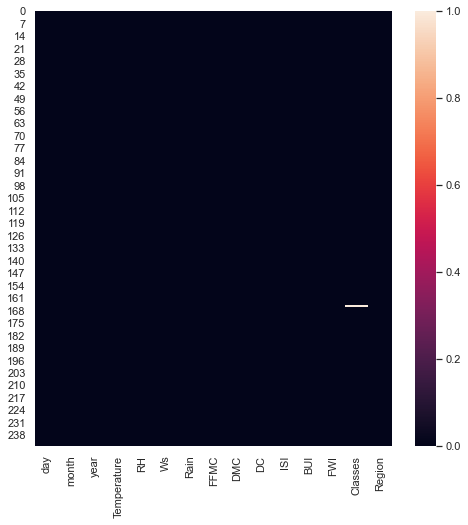

In [9]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(dataset.isnull())

In [10]:
## checking for duplicates


dataset[dataset.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


- We can observe there are no duplicate values

In [11]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype!="O"]
categorical_features=[feature for feature in dataset.columns if feature not in numerical_features]

print(numerical_features,"\n",categorical_features)

['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'] 
 ['Classes', 'Region']


### Univarite analysis

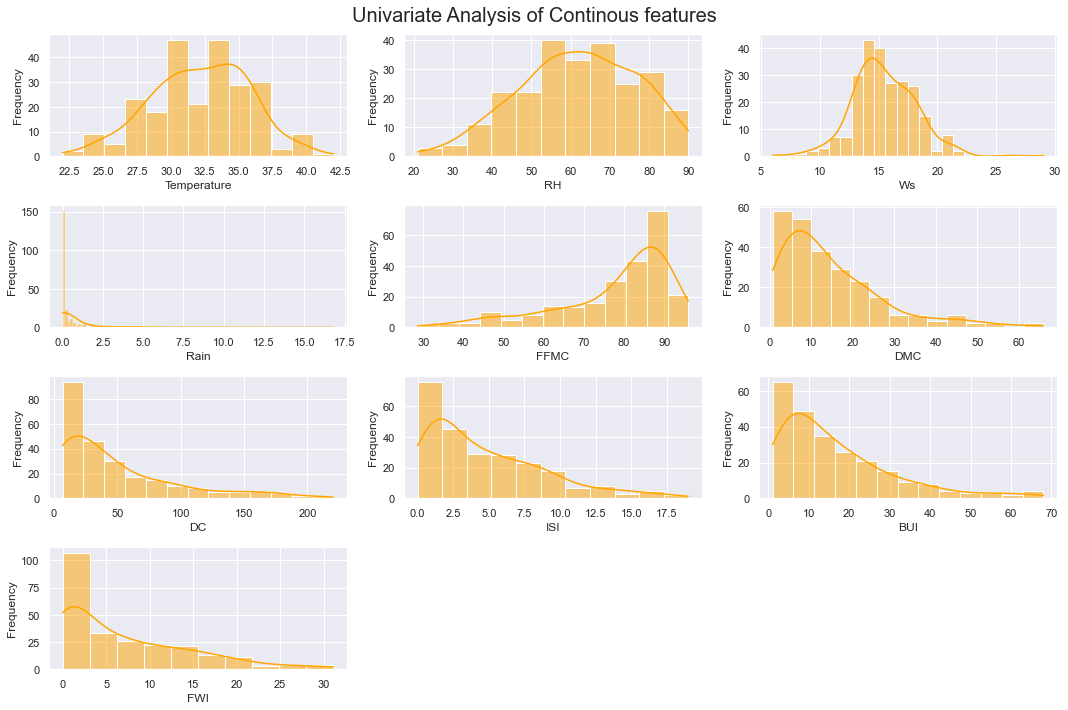

In [12]:
## Plotting Histograms for continous data
sns.set(rc={'figure.figsize':(15,12)})

i=1
plt.suptitle("Univariate Analysis of Continous features",fontsize=20)
for feature in numerical_features[3:]:
    plt.subplot(5,3,i)
    i+=1
    sns.histplot(dataset[feature],kde=True,color='orange',)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()

- RH is approximately normally distributed
- DMC,DC,ISI,BUI,FWI,Rain are Rightly skewed
- FFMC is left skwed

### Univariate analysis of discrete features

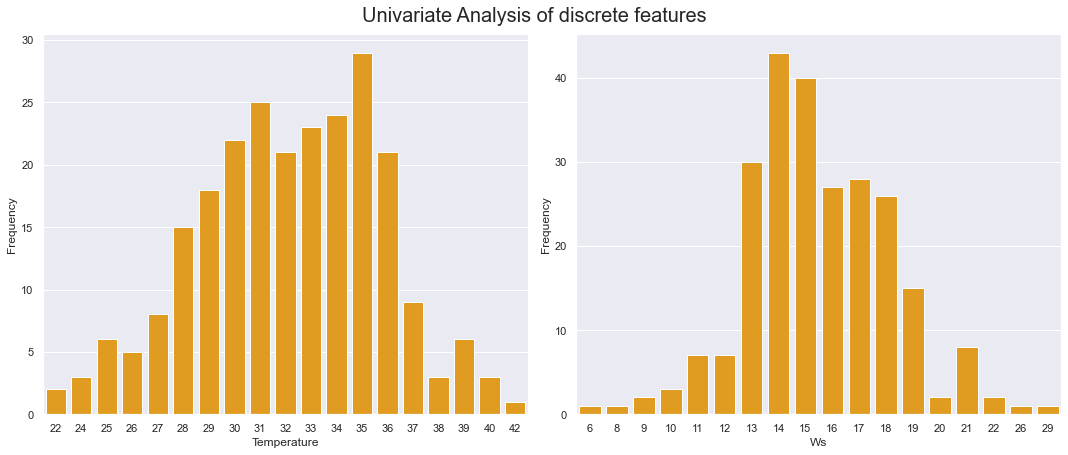

In [13]:
## Plotting count plots for discrete data
i=1
plt.suptitle("Univariate Analysis of discrete features",fontsize=20)

# Temperature and Ws feature consists the data in discrete form 
# Checking frequency of Temperature and WS
for feature in ['Temperature','Ws']:
    plt.subplot(2,2,i)
    i+=1
    sns.countplot(dataset[feature],color='orange',)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()

### Univariate analysis for categorical variables

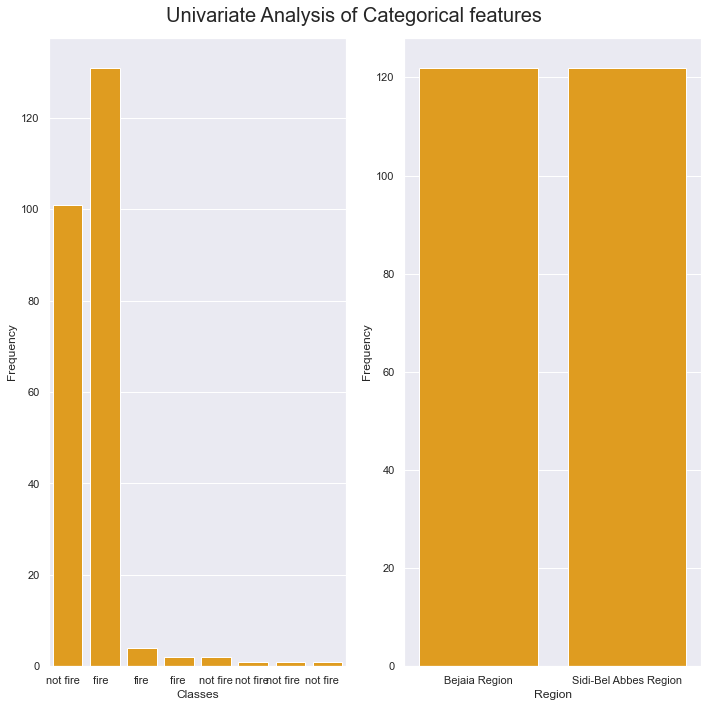

In [14]:
sns.set(rc={'figure.figsize':(10,10)})
i=1
plt.suptitle("Univariate Analysis of Categorical features",fontsize=20)
for feature in categorical_features:
    plt.subplot(1,2,i)
    i+=1
    sns.countplot(dataset[feature],color='orange',)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()

- We can see that there are only 2 features available with different names

In [15]:
dataset['Classes'].unique()

dataset['Classes'].replace({"not fire   ":0,'fire   ':1,'fire':1,'not fire':0,'not fire ':0,'not fire     ':0,'not fire    ':0,'fire ':1},inplace=True)

## Fire = 1
## not fire = 0

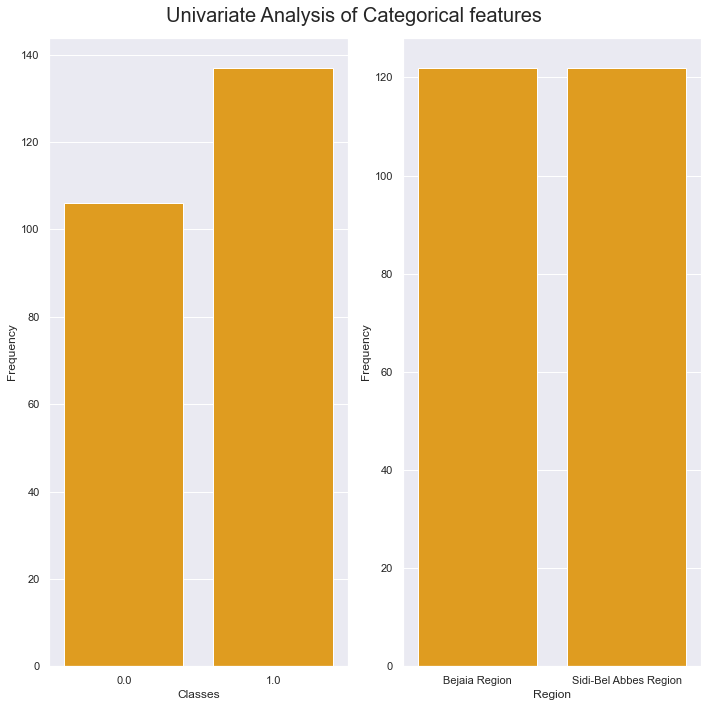

In [16]:
sns.set(rc={'figure.figsize':(10,10)})
i=1
plt.suptitle("Univariate Analysis of Categorical features",fontsize=20)
for feature in categorical_features:
    plt.subplot(1,2,i)
    i+=1
    sns.countplot(dataset[feature],color='orange')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()

<AxesSubplot:xlabel='month'>

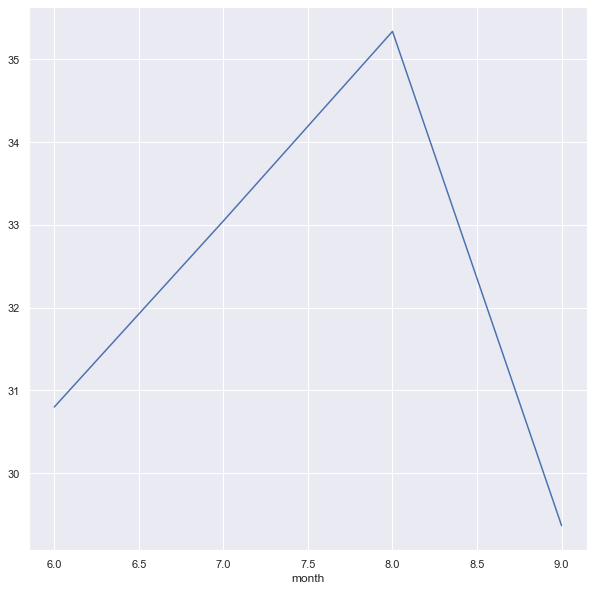

In [17]:
dataset.groupby(['month'])['Temperature'].mean().plot.line()

- We can observe that in the month August we have recorded high temperatures

### Bivariate Analysis of the features with Target Column

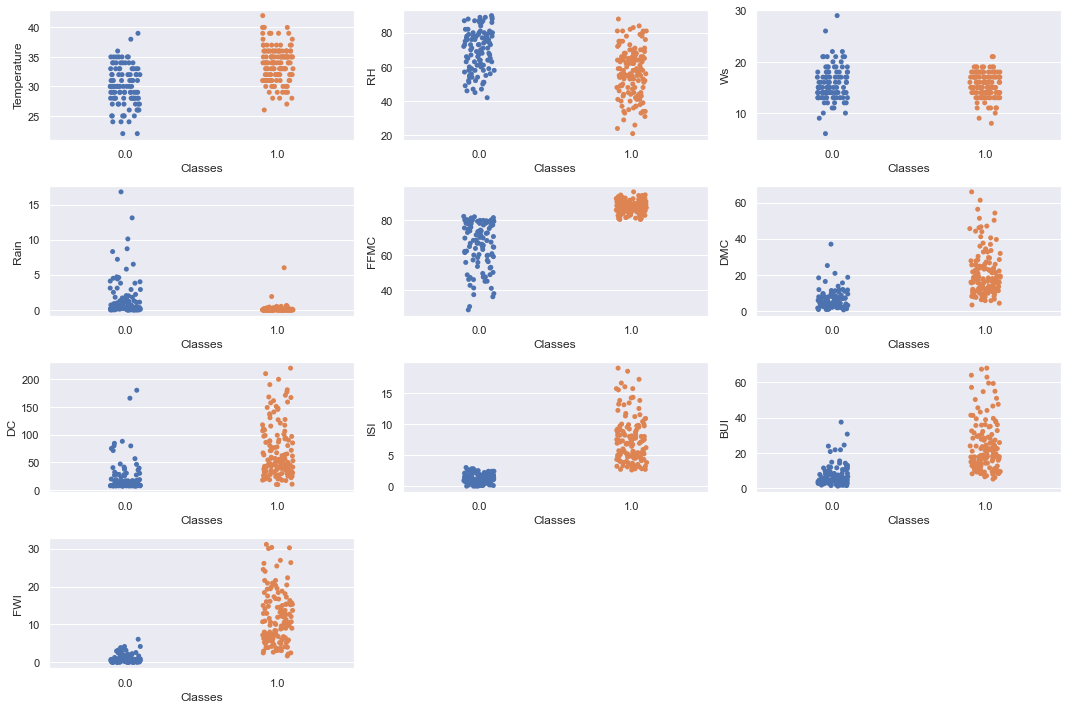

In [18]:
sns.set(rc={"figure.figsize":(15,12)})
i=1
for feature in numerical_features[3:]:
    plt.subplot(5,3,i)
    i+=1
    sns.stripplot(dataset['Classes'],dataset[feature])
    plt.tight_layout()

In [19]:
## Fire = 1
## not fire = 0

- Observation
   - When there is Fire FFMC is very high
   - Fire is occuring when there is less rain conditions
 

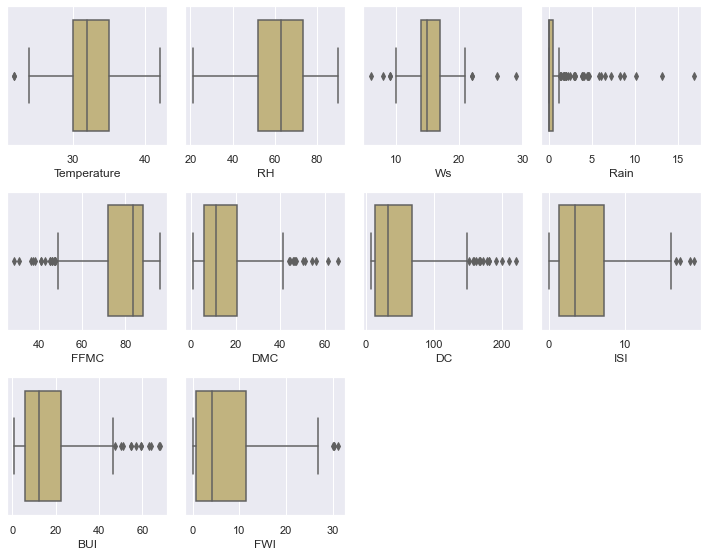

In [20]:
## Checking outliers for continous data
sns.set(rc={'figure.figsize':(10,10)})
i=1
for feature in numerical_features[3:]:
    plt.subplot(4,4,i)
    i=i+1
    data=dataset.copy()
    sns.boxplot(feature,data=dataset,color='y')
    plt.tight_layout()

- Observation
    - We can observe that Rain,DMC,DC,ISI,FWI are Right skewed and contains outliers

<AxesSubplot:>

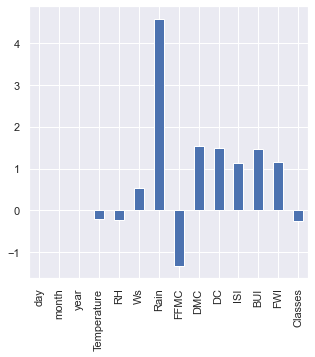

In [21]:
sns.set(rc={'figure.figsize':(5,5)})

dataset.skew().plot.bar()

In [22]:
# Checking the distribution

import scipy.stats as stats
sns.set(rc={'figure.figsize':(15,15)})

In [23]:
def check_dist(df,numerical_features):
    i=1
    for feature in numerical_features:
        plt.subplot(5,3,i)
        sns.histplot(df[feature],kde=True)
        plt.title(feature)
        i+=1
        plt.tight_layout()

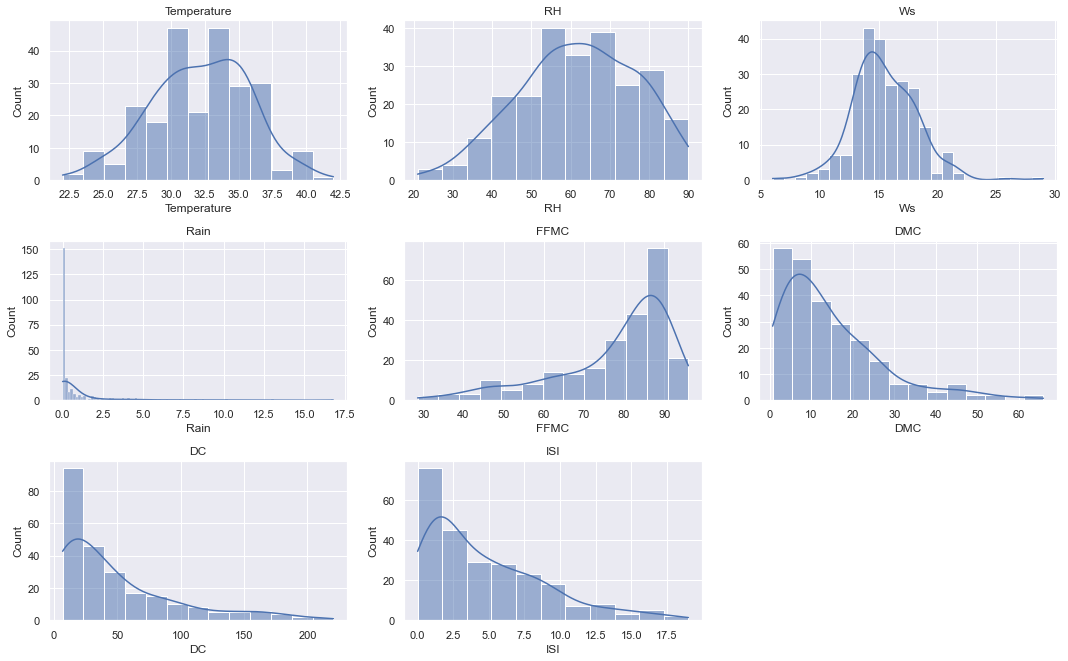

In [24]:
check_dist(dataset,numerical_features[3:11])

In [25]:
## performing transformations

def log_transformation(df,features):
    transformer = FunctionTransformer(np.log)
    data_tf = transformer.transform(df[features])
    for column in data_tf.columns:
        data_tf[column].replace([np.inf,-np.inf],0,inplace=True)
    return data_tf


In [26]:
df_log = log_transformation(dataset,['DMC', 'DC', 'ISI', 'BUI', 'FWI','Rain'])

In [27]:
df_log

,DMC,DC,ISI,BUI,FWI,Rain
0,1.223775,2.028148,0.262364,1.223775,-0.693147,0.000000
1,1.410987,2.028148,0.000000,1.360977,-0.916291,0.262364
2,0.916291,1.960095,-1.203973,0.993252,-2.302585,2.572612
3,0.262364,1.931521,0.000000,0.530628,0.000000,0.916291
4,1.098612,2.653242,0.182322,1.360977,-0.693147,0.000000
...,...,...,...,...,...,...
239,2.772589,3.795489,1.504077,2.827314,1.871802,0.000000
240,1.871802,2.079442,-2.302585,1.824549,0.000000,1.481605
241,1.252763,2.066863,-0.916291,1.223775,-1.609438,-0.693147
242,1.458615,2.721295,0.530628,1.629241,-0.356675,-2.302585


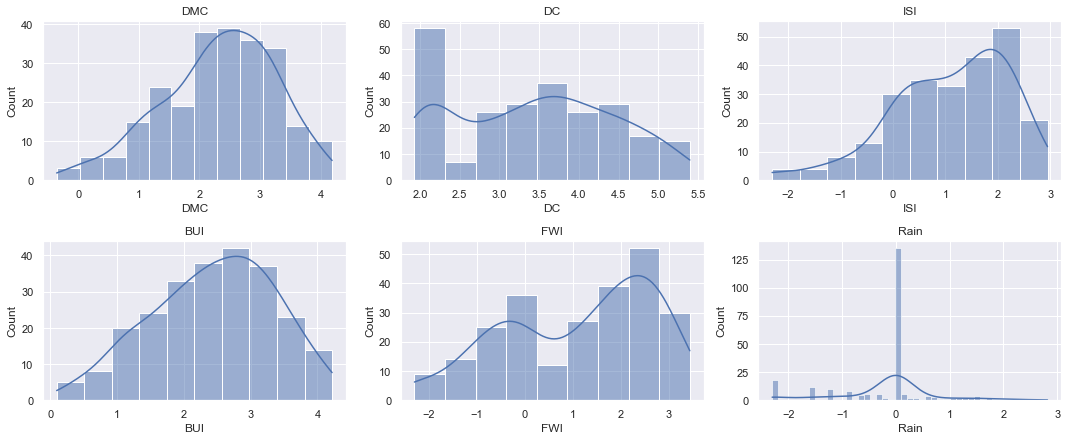

In [28]:
check_dist(df_log,df_log.columns)

In [29]:
def reciprocal_transformation(df,features):
    transformer = FunctionTransformer(np.reciprocal)
    data_tf = transformer.transform(df[features])
    for column in data_tf.columns:
        data_tf[column].replace([np.inf,-np.inf],0,inplace=True)
    return data_tf

In [30]:
df_reciprocal = reciprocal_transformation(dataset,['DMC', 'DC', 'ISI', 'BUI', 'FWI','Rain'])

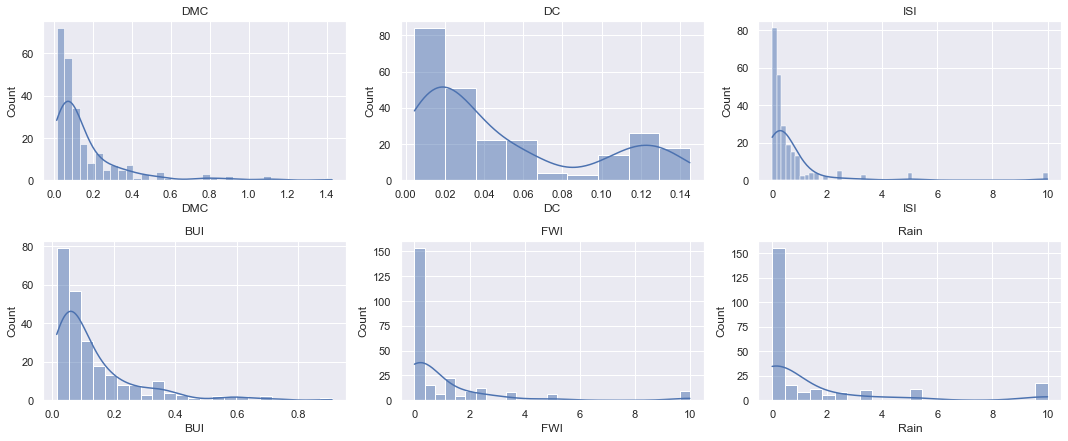

In [31]:
check_dist(df_reciprocal,df_reciprocal.columns)

In [34]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,Bejaia Region
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,Bejaia Region
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,Bejaia Region
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,Bejaia Region
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,Bejaia Region


In [91]:
X=dataset.copy()

X.drop(['Classes','Region','day','month','year'],inplace=True,axis=1)

y=dataset['Classes']

y.fillna(1.0,inplace=True)

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

#### Applying Box-cox

In [93]:
from sklearn.preprocessing import PowerTransformer

In [94]:
pt=PowerTransformer(method='box-cox')

In [95]:
pt

PowerTransformer(method='box-cox')

In [98]:
x_train_scaled=pt.fit_transform(X_train+0.000001)
x_test_scaled=pt.transform(X_test+0.000001)

In [99]:
pd.DataFrame({"cols":X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Temperature,1.334609
1,RH,1.406995
2,Ws,0.550310
3,Rain,-0.029536
4,FFMC,3.843327
5,DMC,0.155248
6,DC,-0.034018
7,ISI,0.334510
8,BUI,0.100110
9,FWI,0.256278


#### Cheking the distribution before and after transformation

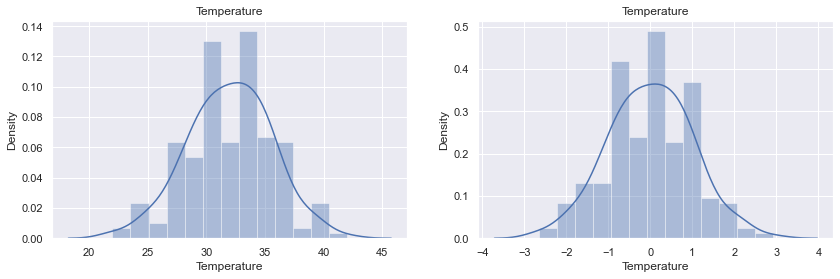

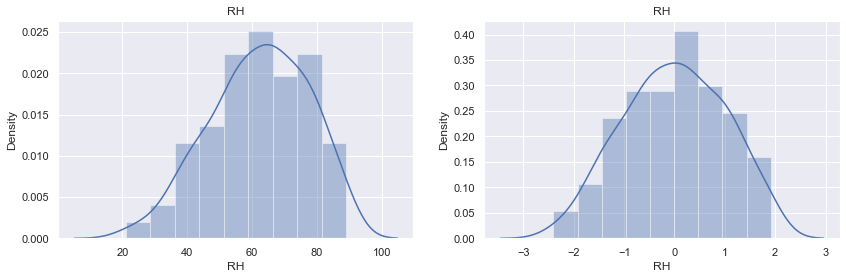

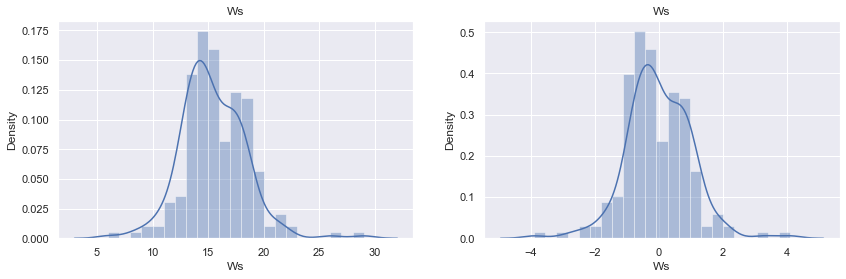

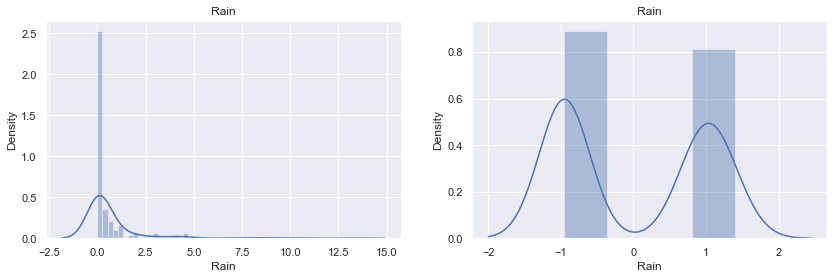

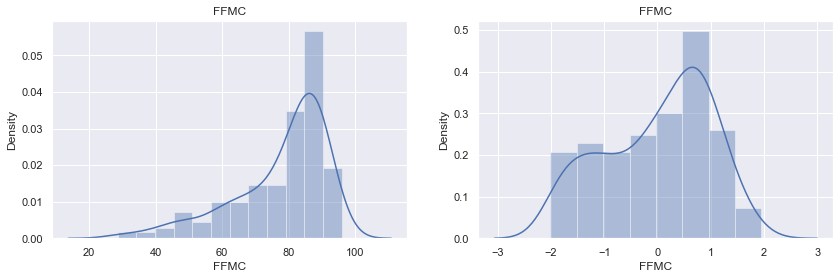

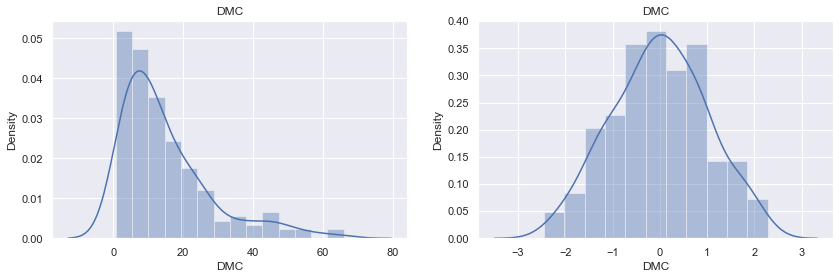

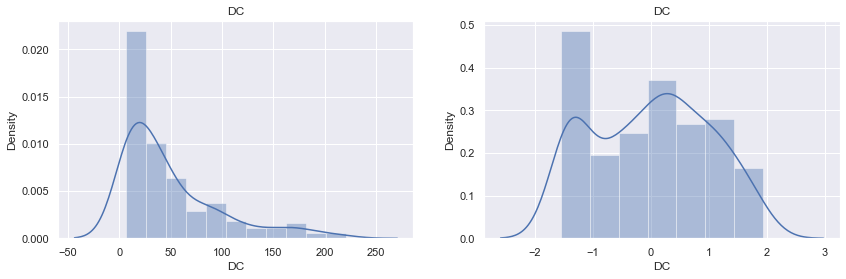

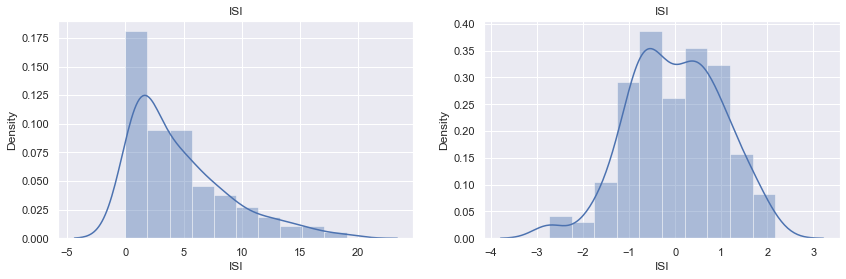

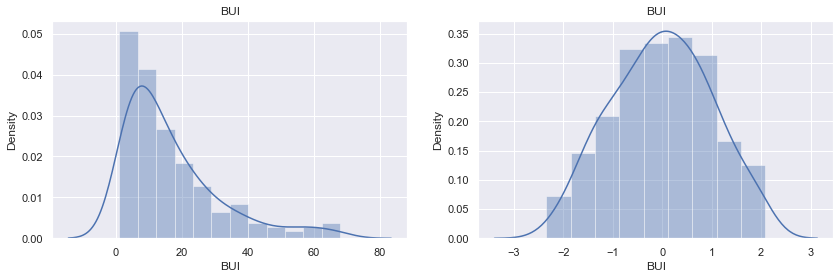

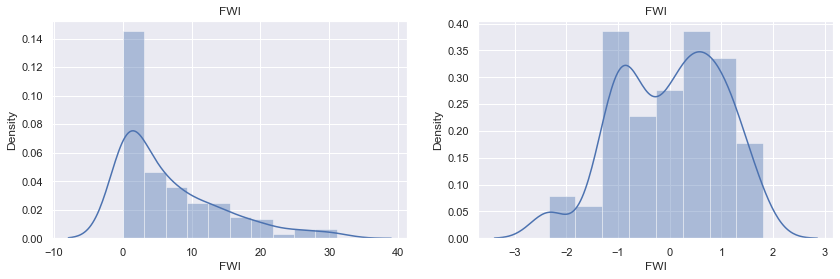

In [100]:
X_train_transformed = pd.DataFrame(x_train_scaled,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

In [101]:
log_reg=LogisticRegression()

In [103]:
log_reg.fit(x_train_scaled,y_train)
log_pred=log_reg.predict(x_test_scaled)

accuracy=accuracy_score(y_test,log_pred)
accuracy

0.9591836734693877

In [104]:
confusion_mat=confusion_matrix(y_test,log_pred)

confusion_mat

## Checking Accuracy through confustion_matrix output

true_pos=confusion_mat[0][0]
fal_pos=confusion_mat[0][1]
fal_neg=confusion_mat[1][0]
tru_neg=confusion_mat[1][1]

accuracy=(true_pos+tru_neg)/(true_pos+fal_pos+fal_neg+tru_neg)
accuracy

0.9591836734693877

In [105]:
precision=true_pos/(true_pos+fal_pos)
precision

1.0

In [106]:
recall=true_pos/(true_pos+fal_neg)
recall

0.8888888888888888

In [107]:
# F1 Score
F1_Score = 2*(recall * precision) / (recall + precision)
F1_Score

0.9411764705882353

#### Applying yeo-johnson

In [108]:
pt=PowerTransformer()
x_train_scaled2=pt.fit_transform(X_train)
x_test_scaled2=pt.transform(X_test)

In [109]:
pd.DataFrame({"cols":X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Temperature,1.345645
1,RH,1.417181
2,Ws,0.508500
3,Rain,-2.336131
4,FFMC,3.892632
5,DMC,0.053687
6,DC,-0.062162
7,ISI,-0.005351
8,BUI,0.013213
9,FWI,-0.038169


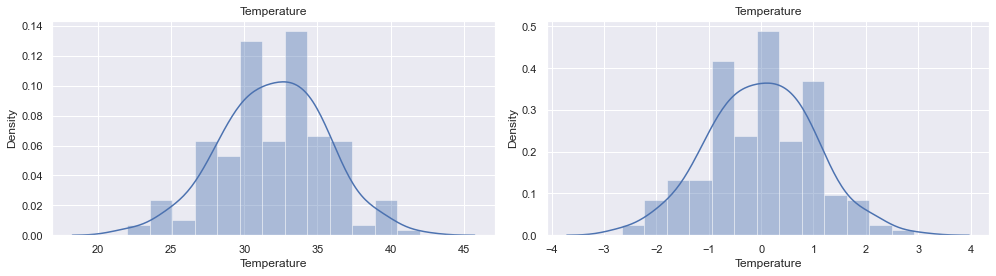

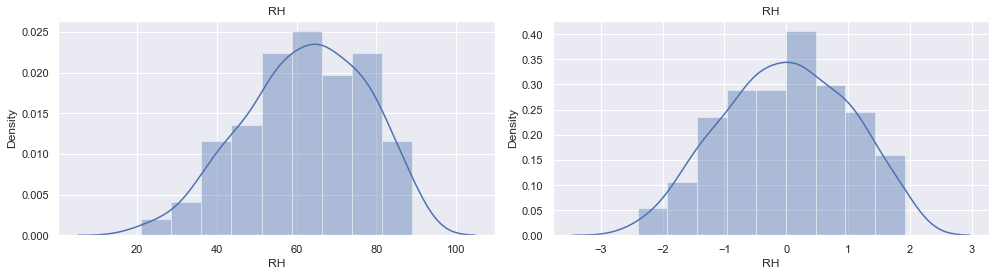

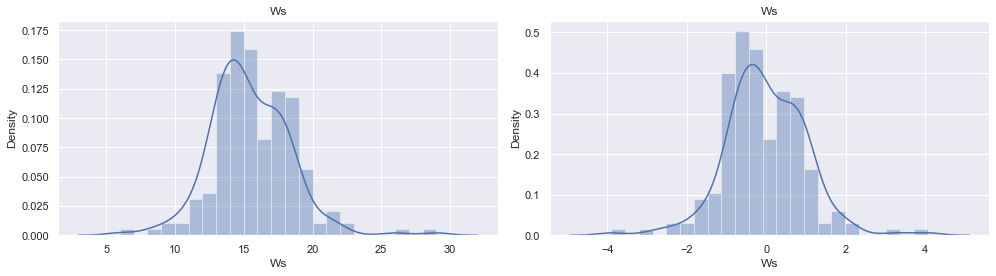

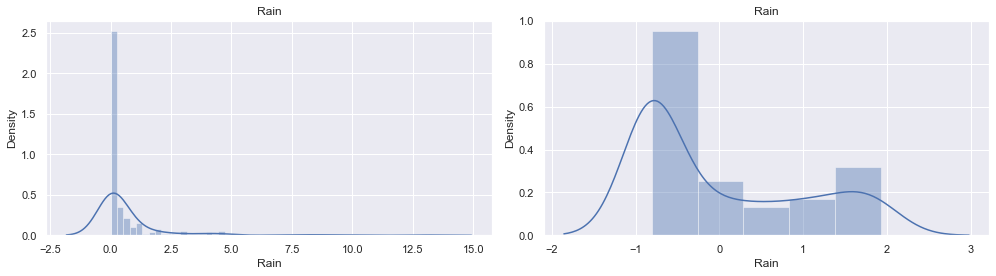

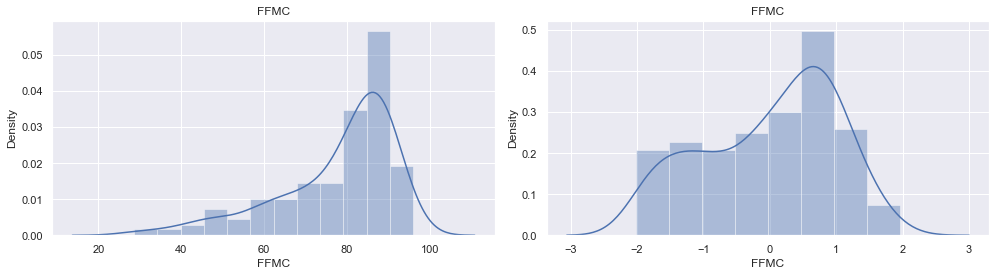

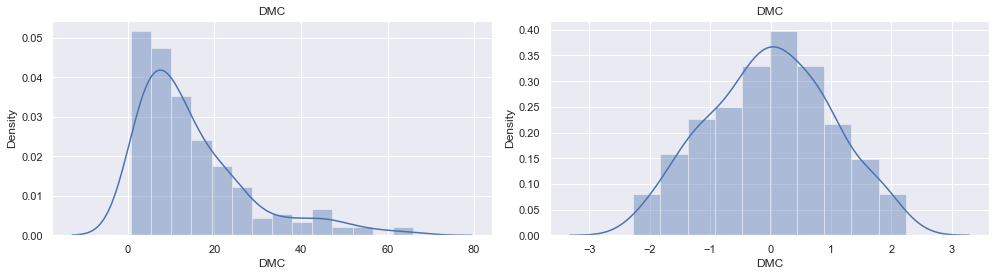

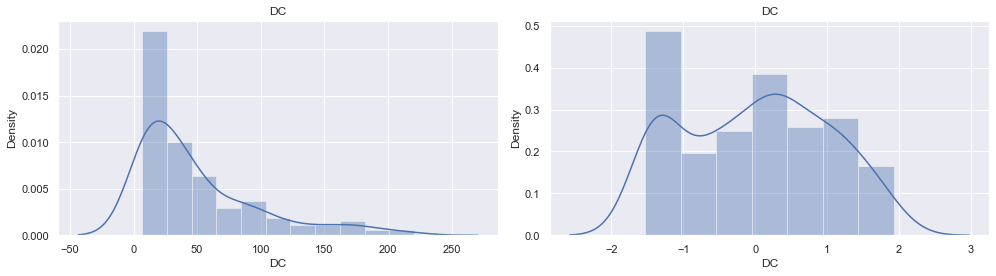

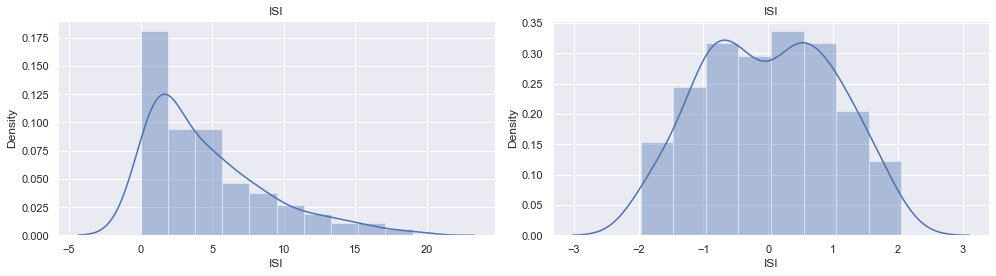

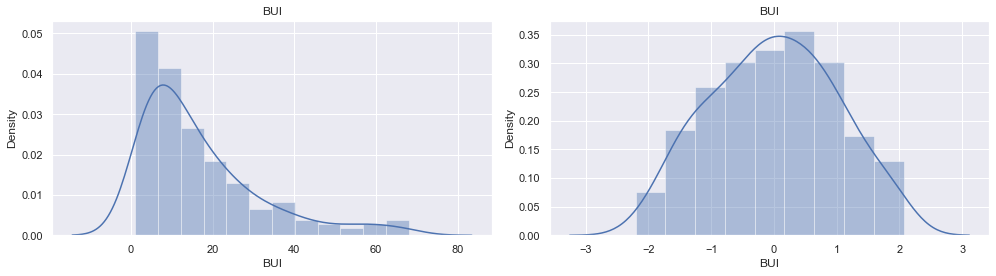

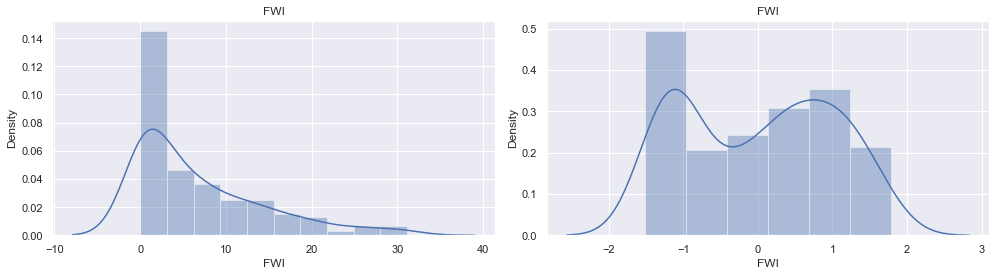

In [117]:
X_train_transformed2 = pd.DataFrame(x_train_scaled2,columns=X_train.columns)

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [111]:
log_reg2=LogisticRegression()

In [112]:
log_reg2.fit(x_train_scaled2,y_train)
log_pred=log_reg2.predict(x_test_scaled2)

accuracy=accuracy_score(log_pred,y_test)
accuracy

0.9387755102040817

In [113]:
confusion_mat=confusion_matrix(y_test,log_pred)

confusion_mat

## Checking Accuracy through confustion_matrix output

true_pos=confusion_mat[0][0]
fal_pos=confusion_mat[0][1]
fal_neg=confusion_mat[1][0]
tru_neg=confusion_mat[1][1]

accuracy=(true_pos+tru_neg)/(true_pos+fal_pos+fal_neg+tru_neg)
accuracy

0.9387755102040817

In [114]:
precision=true_pos/(true_pos+fal_pos)
precision

1.0

In [115]:
recall=true_pos/(true_pos+fal_neg)
recall

0.8421052631578947

In [116]:
# F1 Score
F1_Score = 2*(recall * precision) / (recall + precision)
F1_Score

0.9142857142857143